In [28]:
import pandas as pd
import pickle
from tqdm import tqdm

In [13]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns

def plot_data_distribution(df_path: str | pd.DataFrame, label: str='a%', label_y: str='n_samples') -> None:
    """Given a labelled dataset print the data distribution of its samples

    Args:
        df_path (str | pd.DataFrame): path to the labelled dataframe or the dataframe.
        label (str, optional): label of the column to analyze. Defaults to 'a%'.
        label_y (str, optional): label of the y axis of the chart. Defaults to 'n_samples'.
    """
    if isinstance(df_path, str):
        data = pd.read_csv(df_path)
    else:
        data = df_path
    d = {}
    for i in range(1, 11, 1):
        i /= 10
        prev = round(i-0.1, 2)
        t = data[data[label] >= prev]
        t = t[t[label] < i]
        d[f'{prev}_{i}'] = t.shape[0]
    ##
    t = data[data[label] == 1]
    d['0.9_1.0']+=t.shape[0]
    ## 
    keys = list(d.keys())
    values = list(d.values())
    
    bar_width = 0.5
    
    # Create the bar plot
    plt.bar(keys, values, width=bar_width, color='grey')
    
    for i, v in enumerate(values):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    
    plt.xticks(ha='center', fontsize=8)  # Ruota le etichette sull'asse x di 45 gradi
    plt.subplots_adjust(bottom=0.2) 
    
    # Adding labels and title
    plt.xlabel(f'{label} Range')
    plt.ylabel(label_y)

    # Show the plot
    plt.show()

In [14]:
def get_1_0_cols_rows_tables(td: dict[str:pd.DataFrame]) -> set[list, list]:
    zero_cols_rows = []
    one_col_row = []
    for k in tqdm(td.keys()):
        t = td[k]
        if (t.shape[0] == 1) or (t.shape[1] == 1):
            one_col_row.append(k)
        elif (t.shape[0] == 0) or (t.shape[1] == 0):
            zero_cols_rows.append(k)
    return zero_cols_rows, one_col_row

def find_influenced_samples(triples: pd.DataFrame, one_column_tables: list[str]) -> pd.DataFrame:
    indexes = []
    one_column_tables = set(one_column_tables)
    for r in tqdm(range(triples.shape[0])):
        if (triples.iloc[r,0] in one_column_tables) or (triples.iloc[r,1] in one_column_tables):
            indexes.append(r)
    return triples.iloc[indexes, :]

# Gittables

## Tables

In [3]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/dictionaries/table_dict.pkl', 'rb') as f:
    td_gittables = pickle.load(f)

In [4]:
zero_git, one_git = get_1_0_cols_rows_tables(td_gittables)

100%|██████████| 256834/256834 [00:00<00:00, 365576.74it/s]


In [5]:
len(zero_git)

0

In [6]:
len(one_git)

10284

In [7]:
len(td_gittables.keys())

256834

Almost 4% of the tables have a single column, 10_284 tables over 256_834

In [8]:
zero_rows = []
for k in one_git:
    if td_gittables[k].shape[0] == 1:
        zero_rows.append(k)

In [9]:
len(zero_rows)

0

## Influenced samples

In [24]:
train_gittables = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/train.csv')
test_gittables = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/test.csv')
valid_gittables = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/valid.csv')

influenced_train_git = find_influenced_samples(train_gittables, one_git)
influenced_test_git = find_influenced_samples(test_gittables, one_git)
influenced_valid_git = find_influenced_samples(valid_gittables, one_git)

print(f'Train: {len(influenced_train_git)}/{train_gittables.shape[0]}\nTest: {len(influenced_test_git)}/{test_gittables.shape[0]}\nValid: {len(influenced_valid_git)}/{valid_gittables.shape[0]}')

100%|██████████| 100000/100000 [00:10<00:00, 9707.43it/s]

Train: 14547/500000
Test: 2267/100000
Valid: 2196/100000


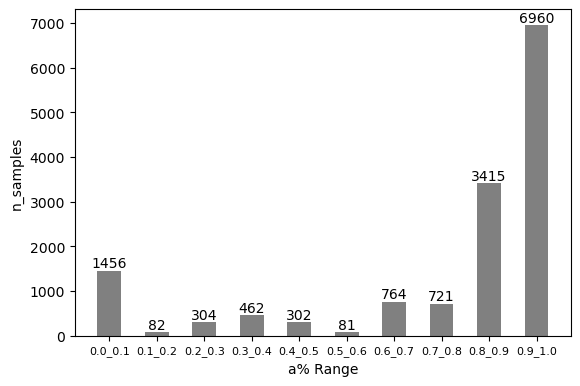

In [34]:
plot_data_distribution(influenced_train_git)

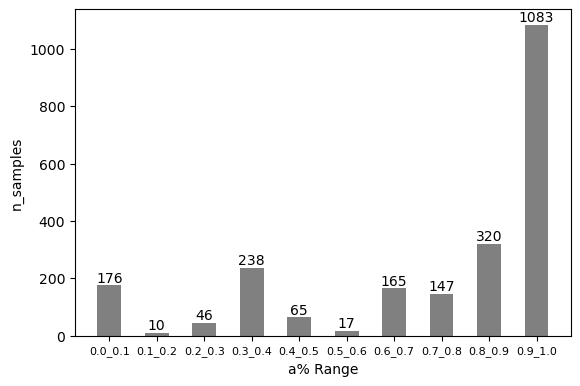

In [35]:
plot_data_distribution(influenced_test_git)

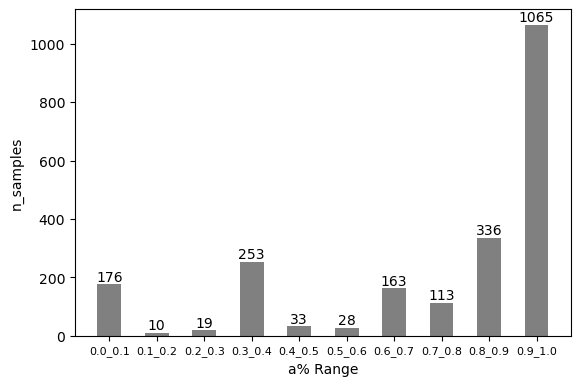

In [36]:
plot_data_distribution(influenced_valid_git)

# Wikilast

In [11]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/dictionaries/table_dict.pkl', 'rb') as f:
    td_wikilast = pickle.load(f)

In [26]:
zero_wiki, one_wiki = get_1_0_cols_rows_tables(td_wikilast)

100%|██████████| 128620/128620 [00:00<00:00, 297989.24it/s]


In [27]:
len(zero_wiki)

0

In [28]:
len(one_wiki)

92

In [29]:
zero_rows_wiki = []
for k in one_wiki:
    if td_wikilast[k].shape[0] == 1:
        zero_rows_wiki.append(k)
len(zero_rows_wiki)

0

## Influenced samples

In [30]:
train_wikilast = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/train.csv')
test_wikilast = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/test.csv')
valid_wikilast = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/valid.csv')

influenced_train_wiki = find_influenced_samples(train_wikilast, one_wiki)
influenced_test_wiki = find_influenced_samples(test_wikilast, one_wiki)
influenced_valid_wiki = find_influenced_samples(valid_wikilast, one_wiki)

print(f'Train: {len(influenced_train_wiki)}/{train_wikilast.shape[0]}\nTest: {len(influenced_test_wiki)}/{test_wikilast.shape[0]}\nValid: {len(influenced_valid_wiki)}/{valid_wikilast.shape[0]}')

100%|██████████| 60000/60000 [00:01<00:00, 34209.08it/s]

Train: 173/500000
Test: 9/60000
Valid: 59/60000


In [31]:
print(len(td_wikilast))
for r in tqdm(range(valid_wikilast.shape[0])):
    td_wikilast[train_wikilast.iloc[r,0]]
    td_wikilast[train_wikilast.iloc[r,1]]

128620


100%|██████████| 60000/60000 [00:01<00:00, 33308.48it/s]


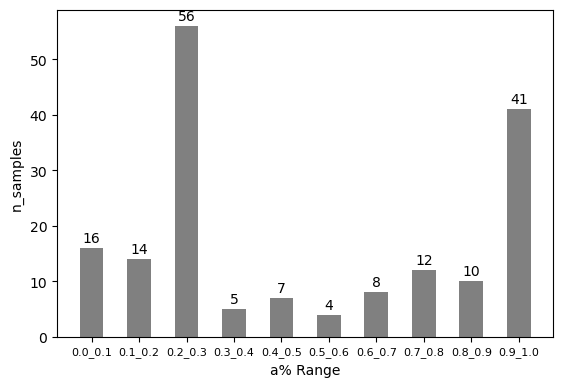

In [32]:
plot_data_distribution(influenced_train_wiki)

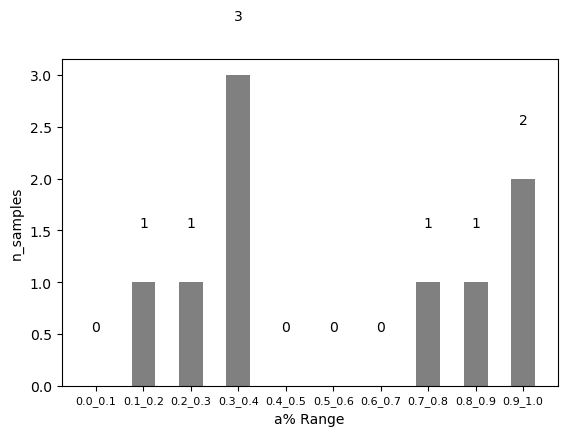

In [33]:
plot_data_distribution(influenced_test_wiki)

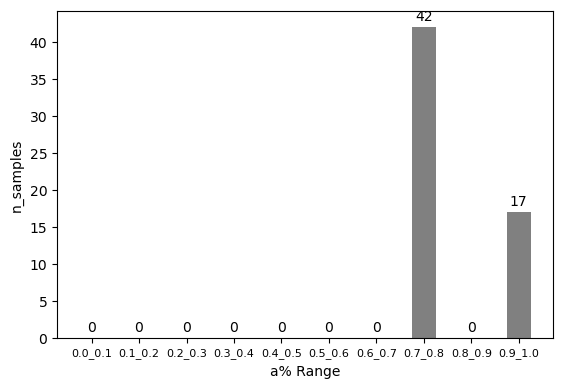

In [34]:
plot_data_distribution(influenced_valid_wiki)

# Unusued tables identification wikilast

In [2]:
def get_tables_list(df = pd.DataFrame) -> list:
    out = []
    for r in tqdm(range(df.shape[0])):
        out.append(df.iloc[r,0])
        out.append(df.iloc[r,1])
    return list(set(out))

In [6]:
import pandas as pd
import pickle
from tqdm import tqdm

train_wikilast = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/train.csv')
test_wikilast = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/test.csv')
valid_wikilast = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/valid.csv')

train_tables_wiki = get_tables_list(train_wikilast)
test_tables_wiki = get_tables_list(test_wikilast)
valid_tables_wiki = get_tables_list(valid_wikilast)

all_tables_wiki = set(train_tables_wiki+test_tables_wiki+valid_tables_wiki)

print(f'Total number:{len(all_tables_wiki)}\nTrain:{len(train_tables_wiki)}\nTest:{len(test_tables_wiki)}\nValid:{len(valid_tables_wiki)}')



100%|██████████| 60000/60000 [00:01<00:00, 34710.79it/s]

Total number:128620
Train:89078
Test:19754
Valid:19802


In [7]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/dictionaries/table_dict.pkl', 'rb') as f:
    td_wikilast = pickle.load(f)

In [8]:
len(td_wikilast.keys())

2127551

In [10]:
for k in tqdm(all_tables_wiki):
    td_wikilast[k].to_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/csv_minimal/'+k, index=False)

100%|██████████| 128620/128620 [00:34<00:00, 3728.59it/s]


In [35]:
import os

filenames = os.listdir('/home/francesco.pugnaloni/armadillo_all/tmp/out/wikilast')

In [36]:
len(filenames)

2127551

In [37]:
type(filenames)

list

In [38]:
len(set(filenames))

2127551

In [1]:
import pandas as pd
tt = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/train.csv')

In [2]:
tt

,r_id,s_id,a%
0,155.39558.csv,437.7146.csv,0.625000
1,323.80474.csv,53.41837.csv,0.363636
2,331.55837.csv,497.29414.csv,0.277778
3,124.96752.csv,230.72970.csv,0.187500
4,237.29154.csv,603.25921.csv,1.000000
...,...,...,...
499995,425.77964.csv,426.139959.csv,1.000000
499996,142.36784.csv,426.63559.csv,0.400000
499997,474.8903.csv,485.23755.csv,0.909091
499998,384.32709.csv,501.26246.csv,1.000000


In [8]:
import pickle
with open('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/dictionaries/embedding_dictionaries/emb_dict_bert_lines_300_300.pkl', 'rb') as f:
    ed = pickle.load(f)

In [9]:
ed

{'id_csv_licensed.zip_0021800856.csv': tensor([[-6.4914e-01,  3.4568e-01,  1.6446e-01, -5.6268e-02, -7.0816e-02,
          -9.5809e-02,  2.5718e-01,  3.1633e-01, -4.9061e-01, -1.0774e-01,
           1.3603e-01,  3.9437e-02, -4.3813e-01,  5.5667e-01,  2.6576e-01,
           4.1633e-01, -4.8661e-01,  1.4619e-01,  3.3383e-01,  1.3886e-01,
          -2.1334e-01, -3.1779e-01,  3.2524e-01, -1.5411e-01, -1.8925e-01,
           1.8977e-03, -2.4326e-01, -4.9683e-01, -3.5240e-01,  1.9017e-01,
          -5.8228e-01,  3.6881e-01, -2.1972e-01, -3.0509e-01,  5.6234e-01,
          -1.2229e-01,  1.5268e-01,  7.5396e-02,  1.5326e-01,  2.8084e-01,
           2.2805e-01, -7.9231e-03,  3.3010e-01, -8.5216e-02,  2.5248e-02,
           2.9103e-01, -3.1249e+00, -1.6106e-01, -7.3443e-01, -1.9897e-01,
           1.4709e-01, -3.5883e-01,  3.4235e-01,  1.9604e-01,  1.5110e-01,
           1.0898e-01, -3.9867e-01,  1.1956e-01,  7.1577e-01,  2.1932e-01,
           2.0452e-01,  1.9067e-01,  4.4785e-01,  1.1836e-01, 

In [10]:
len(ed.keys())

11

In [1]:
import pickle
with open('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/dictionaries/embedding_dictionaries/emb_dict_turl_tables_300_300.pkl', 'rb') as f:
    ed = pickle.load(f)

In [2]:
nones = []
for k in ed.keys():
    if ed[k] == None:
        nones.append(k)

In [3]:
len(nones)

0

In [5]:
keys = list(ed.keys())
ed[keys[0]].shape

torch.Size([312])

In [6]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/dictionaries/table_dictionaries/table_dict.pkl', 'rb') as f:
    td = pickle.load(f)

In [7]:
lk = list(td.keys())

In [20]:
td[lk[121500]]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
1,log4j,1.2,org.apache.log4j.chainsaw.XMLFileHandler,8,2,0,4,22,4,1,...,1.0,2,0.708333333,0.291666667,1,2,31.125,6,2.375,3
2,log4j,1.2,org.apache.log4j.spi.Configurator,1,1,0,7,1,0,6,...,0.0,0,0.0,1.0,0,0,0.0,1,1.0,2
3,log4j,1.2,org.apache.log4j.nt.test.NTMin,7,1,0,6,30,17,0,...,0.0,1,0.0,0.277777778,0,0,19.28571429,2,0.8571,1
4,log4j,1.2,org.apache.log4j.or.DefaultRenderer,2,1,0,2,4,1,1,...,0.0,0,0.0,0.75,0,0,3.0,1,0.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,log4j,1.2,org.apache.log4j.test.MDCStress,10,2,0,6,38,9,0,...,0.0,2,0.884057971,0.222222222,0,0,30.6,4,2.0,1
202,log4j,1.2,org.apache.log4j.helpers.DateLayout,11,2,1,7,27,19,1,...,0.555555556,0,0.444444444,0.303030303,0,0,16.18181818,7,2.0,2
203,log4j,1.2,org.apache.log4j.net.test.SocketMin,8,1,0,7,42,14,0,...,0.0,2,0.0,0.238095238,0,0,37.0,4,1.5,2
204,log4j,1.2,org.apache.log4j.test.X1Logger,7,3,0,5,19,7,1,...,0.333333333,1,0.912280702,0.5,2,2,9.142857143,1,0.7143,0


In [1]:
import pandas as pd

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/test.csv')

In [3]:
dd.head()

,r_id,s_id,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,os_sim_AE
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166,0.367949,0.521457
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202,0.030000,0.187500
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128,0.333947,0.533406
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886,0.107692,0.018182
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327,0.205929,0.510417


In [15]:
t1 = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/csv/198.7650.csv')

In [16]:
t1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Team,1,2,3,4,5,6,7,8,9,R,H,E
1,Boston,2,0,1,0,0,2,0,0,0,5,10,0
2,Cleveland,1,5,1,0,0,1,0,1,0,9,9,1
3,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...
4,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice


In [5]:
import pickle
with open('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/dictionaries/table_dictionaries/table_dict.pkl', 'rb') as f:
    td = pickle.load(f)

In [17]:
td['198.7650.csv']

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,2,3,4,5,6,7,8,9,10,11,12
1,Team,1,2,3,4,5,6,7,8,9,R,H,E
2,Boston,2,0,1,0,0,2,0,0,0,5,10,0
3,Cleveland,1,5,1,0,0,1,0,1,0,9,9,1
4,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...,W: Dave Burba (1-0) &nbsp;&nbsp;L: Tim Wakefie...
5,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice,HR: CLE: David Justice


In [13]:
t1.shape

(6, 13)

In [19]:
l_t1 = []
for c in range(t1.shape[1]):
    l_t1.append(list(t1.iloc[:,c]))

In [21]:
len(l_t1)

13

In [22]:
type(l_t1)

list

In [1]:
import pandas as pd

In [2]:
dw = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/tmp/wrong_labels_test.csv')

In [5]:
dw

,r_id,s_id,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,os_sim_AE
0,441.155903.csv,618.72349.csv,110,0.487179,7.390976e-06,0.791667,2.861023e-06,0.281250,3.848327,0.205929,0.510417
1,441.155889.csv,442.29082.csv,400,0.758621,5.245209e-06,0.916667,2.145767e-06,0.250000,4.957274,0.508621,0.666667
2,440.139430.csv,486.24144.csv,23,0.600000,3.099442e-06,0.900000,1.668930e-06,0.666667,0.000514,0.066667,0.233333
3,497.133983.csv,501.60553.csv,47,1.000000,7.152557e-06,1.000000,2.861023e-06,0.489796,0.001499,0.510204,0.510204
4,497.38280.csv,618.72349.csv,53,0.651163,4.768372e-06,0.823529,2.384186e-06,0.166667,0.127784,0.484496,0.656863
...,...,...,...,...,...,...,...,...,...,...,...
95,148.12666.csv,609.17640.csv,26,1.000000,5.483627e-06,1.000000,2.145767e-06,1.000000,0.000492,0.000000,0.000000
96,482.118325.csv,86.17813.csv,42,1.000000,7.152557e-07,1.000000,4.768372e-07,0.857143,0.000340,0.142857,0.142857
97,197.10593.csv,468.112597.csv,40,1.000000,4.768372e-07,1.000000,4.768372e-07,0.714286,0.000373,0.285714,0.285714
98,251.33570.csv,383.5742.csv,5,0.458333,3.337860e-06,0.785714,1.668930e-06,0.360000,0.000310,0.098333,0.425714


In [3]:
dg = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/tmp/wrong_labels_test.csv')

In [1]:
import pandas as pd
pp = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/gittables/tmp/wrong_labels_test.csv')

In [2]:
pp

,r_id,r_rows,r_cols,r_area,s_id,s_rows,s_cols,s_area,a_overlap_recomputed,a%_recomputed,a%_test_dataset
0,quick_time_csv_licensed.zip_recipe_1798.csv,9,16,144,quick_time_csv_licensed.zip_recipes_44.csv,7,15,105,66,0.628571,0.685714
1,object_csv_licensed.zip_metadata-guidelines_11...,17,8,136,physical_entity_csv_licensed.zip_metadata-info...,18,8,144,90,0.661765,0.823529
2,id_csv_licensed.zip_ir.model.access_15203.csv,4,8,32,id_csv_licensed.zip_ir.model.access_41371.csv,8,8,64,28,0.875000,1.000000
3,id_csv_licensed.zip_account.tax.template_2368.csv,13,18,234,parent_csv_licensed.zip_account.tax.template_3...,13,18,234,182,0.777778,0.833333
4,id_csv_licensed.zip_StructureDefinition-hla-ge...,5,36,180,id_csv_licensed.zip_StructureDefinition-patien...,6,36,216,40,0.222222,0.388889
...,...,...,...,...,...,...,...,...,...,...,...
95,id_csv_licensed.zip_boxscore_0021401164_1.csv,26,29,754,id_csv_licensed.zip_boxscore_0021501129.csv,26,29,754,52,0.068966,0.095491
96,id_csv_licensed.zip_0021700631.csv,26,29,754,id_csv_licensed.zip_0021701200.csv,24,29,696,44,0.063218,0.099138
97,split_shift_csv_licensed.zip_Settings_ISBI_201...,160,2,320,split_shift_csv_licensed.zip_Settings_ISBI_201...,149,2,298,222,0.744966,0.791946
98,id_csv_licensed.zip_0021701017_8.csv,24,29,696,id_csv_licensed.zip_0022000414_6.csv,25,29,725,30,0.043103,0.086207


In [3]:
dd = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/tmp/wrong_labels_test.csv')

In [4]:
dd

,r_id,r_rows,r_cols,r_area,s_id,s_rows,s_cols,s_area,a_overlap_recomputed,a%_recomputed,a%_test_dataset
0,441.155903.csv,4,20,80,618.72349.csv,2,32,64,1,0.015625,0.281250
1,441.155889.csv,4,20,80,442.29082.csv,4,20,80,40,0.500000,0.250000
2,440.139430.csv,2,6,12,486.24144.csv,2,11,22,4,0.333333,0.666667
3,497.133983.csv,7,7,49,501.60553.csv,7,7,49,20,0.408163,0.489796
4,497.38280.csv,6,7,42,618.72349.csv,2,32,64,1,0.023810,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
95,403.62226.csv,2,36,72,600.5751.csv,6,11,66,3,0.045455,0.075758
96,387.134034.csv,6,7,42,497.127662.csv,7,7,49,16,0.380952,0.476190
97,54.44752.csv,1,41,41,66.60764.csv,1,38,38,27,0.710526,0.736842
98,376.89279.csv,6,10,60,419.101182.csv,3,10,30,9,0.300000,0.333333


In [1]:
import pandas as pd
t1 = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/csv/123.66036.csv')
t2 = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/csv/123.66050.csv')

In [2]:
t1 = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/csv/123.66036.csv')
t1

,0,1
0,Key,Key
1,NaN,Minnesota Valley Transit Authority route
2,NaN,Maple Grove Transit route
3,NaN,Plymouth Metrolink route
4,NaN,SouthWest Transit route
5,X-X-X,Express route
6,X-X-X,Limited stop route


In [6]:
t2 = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/wikilast/csv/123.66050.csv')
print((t2.iloc[1,0]))
print(type(t2.iloc[1,0]))
t2

nan
<class 'float'>


,0,1
0,Key,Key
1,NaN,Minnesota Valley Transit Authority route
2,NaN,Maple Grove Transit route
3,NaN,Plymouth Metrolink route
4,NaN,SouthWest Transit route
5,X-X-X,Express route
6,X-X-X,Limited stop route


In [13]:
tk = table_dict['123.66050.csv']

tk

,0,1
0,Key,Key
1,NaN,Minnesota Valley Transit Authority route
2,NaN,Maple Grove Transit route
3,NaN,Plymouth Metrolink route
4,NaN,SouthWest Transit route
5,X-X-X,Express route
6,X-X-X,Limited stop route


In [15]:
print(type(tk.iloc[1,0]))

<class 'float'>


In [7]:
type(pd.NA)

pandas._libs.missing.NAType

In [1]:
import pandas as pd
from tqdm import tqdm

def remap_names(df):
    new = []
    for r in tqdm(range(df.shape[0])):
        old = df.iloc[r].iloc[0]
        new.append(str(old)+'.csv')
    out = df.copy()
    out['_id'] = new
    return out


In [2]:
train_metadata = '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train/metadata_train.csv'
train_metadata_out = '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train/metadata.csv'
test_metadata = '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test/metadata_test.csv'
test_metadata_out = '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test/metadata.csv'
valid_metadata = '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/valid/metadata_valid.csv'
valid_metadata_out = '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/valid/metadata.csv'

remap_names(pd.read_csv(train_metadata, dtype=str)).to_csv(train_metadata_out, index=False)
remap_names(pd.read_csv(test_metadata, dtype=str)).to_csv(test_metadata_out, index=False)
remap_names(pd.read_csv(valid_metadata, dtype=str)).to_csv(valid_metadata_out, index=False)

100%|██████████| 19802/19802 [00:00<00:00, 55270.88it/s]


In [39]:
meta = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test/metadata.csv')

In [40]:
meta

,_id,context,num_columns,num_rows,num_header_rows
0,366.12188.csv,"['Rhett Rakhshani', 'Career statistics | Regul...",13,20,0
1,377.20404.csv,"['Cantic 8-cube', '']",2,15,0
2,493.98842.csv,"['Finland at the 2020 Summer Olympics', 'Swimm...",8,3,1
3,349.9618.csv,['Estonia in the Eurovision Song Contest 2000'...,2,10,0
4,477.131781.csv,"['S. Thinagaran', 'Career statistics | Club']",13,5,3
...,...,...,...,...,...
19749,217.88229.csv,"['1887 Baltimore Orioles season', 'Player stat...",7,2,0
19750,220.31515.csv,"['Hal Robson-Kanu', 'Career statistics | Inter...",3,11,2
19751,472.49818.csv,"['1929–30 Welsh Cup', 'Final']",4,3,0
19752,81.46316.csv,"['Noh Jung-yoon', 'National team statistics']",3,14,2


In [41]:
pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test/tables/81.46316.csv', dtype=str, header=None, skiprows=2)

,0,1,2
0,1990,8,1
1,1991,0,0
2,1992,1,0
3,1993,8,1
4,1994,5,0
5,1995,0,0
6,1996,0,0
7,1997,0,0
8,1998,5,0
9,1999,5,1


In [1]:
import pandas as pd

In [4]:
dd = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/charts/effe_effi_wikilast.csv')

In [5]:
dd

,r_id,s_id,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,os_sim_AE,graphs_generation_time,embeddings_generation_time,cos_sim_time_armadillo,armadillo_total_time,overlap_computations_repeated_armadillo,overlap_computations_no_read_armadillo,armadillo_wikilast,armadillo_wikilast_AE
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166,0.367949,0.521457,0.005052,0.002011,0.039196,0.046264,0.009987,0.008926,0.269506,0.054121
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202,0.030000,0.187500,0.002586,0.002096,0.000171,0.004856,0.000342,0.000146,0.420305,0.170305
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128,0.333947,0.533406,0.021615,0.001775,0.000141,0.023534,0.000224,0.000127,0.132417,0.026648
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886,0.107692,0.018182,0.002157,0.001622,0.000138,0.003920,0.000221,0.000126,0.545643,0.254357
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327,0.205929,0.510417,0.005797,0.001618,0.000137,0.007556,0.000220,0.000125,0.275907,0.005343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000009,0.933333,0.000003,0.058065,11.562310,0.816935,0.875269,0.040394,0.001684,0.000140,0.042220,0.000212,0.000123,0.510201,0.452136
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000014,0.687500,0.000005,0.200000,3.126973,0.291071,0.487500,0.014808,0.001652,0.000138,0.016600,0.000214,0.000125,0.484233,0.284233
59997,382.160.csv,440.84900.csv,12,0.300000,0.000005,0.500000,0.000002,0.333333,0.000358,0.033333,0.166667,0.002302,0.001581,0.000137,0.004021,0.000213,0.000123,0.647074,0.313741
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000003,0.600000,0.000002,0.400000,0.000246,0.028571,0.200000,0.001531,0.001576,0.000136,0.003243,0.000212,0.000122,0.532416,0.132416


In [8]:
dd['armadillo_wikilast_AE'].mean()

0.11301195738452716

In [1]:
import pandas as pd
dd = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train.csv')

In [3]:
import pickle
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/table_dict.pkl', 'rb') as f:
    tt = pickle.load(f)

In [2]:
dd.iloc[219]

r_id    213.49660.csv
s_id    616.55267.csv
a%                1.0
Name: 219, dtype: object

In [4]:
tt['213.49660.csv']

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [5]:
tt['616.55267.csv']

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [6]:
dd.iloc[218]

r_id    429.158740.csv
s_id     429.98504.csv
a%                 0.6
Name: 218, dtype: object

In [7]:
tt['429.158740.csv']

,0,1,2,3,4,5,6,7,8,9
0,Place,Team,Games,Games,Games,Games,Points,Points,Points,Table\npoints
1,Place,Team,played,won,drawn,lost,for,against,diff.,Table\npoints
2,1,Chubut,2,2,0,0,51,32,19,4
3,2,Austral,2,1,0,1,55,23,32,2
4,3,Lagos del Sur,2,0,0,2,17,68,-51,0


In [8]:
tt['429.98504.csv']

,0,1,2,3,4,5,6,7,8,9
0,Place,Team,Games,Games,Games,Games,Points,Points,Points,Table\npoints
1,Place,Team,played,won,drawn,lost,for,against,diff.,Table\npoints
2,1,Lagos del Sur,2,2,0,0,36,6,+ 30,4
3,2,Andina,2,1,0,1,13,23,- 10,2
4,3,Austral,2,0,0,2,3,23,- 20,0


In [3]:
import pandas as pd
dd = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test.csv')
dd

,r_id,s_id,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,os_sim_AE
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166,0.367949,0.521457
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202,0.030000,0.187500
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128,0.333947,0.533406
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886,0.107692,0.018182
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327,0.205929,0.510417
...,...,...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000009,0.933333,0.000003,0.058065,11.562310,0.816935,0.875269
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000014,0.687500,0.000005,0.200000,3.126973,0.291071,0.487500
59997,382.160.csv,440.84900.csv,12,0.300000,0.000005,0.500000,0.000002,0.333333,0.000358,0.033333,0.166667
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000003,0.600000,0.000002,0.400000,0.000246,0.028571,0.200000


In [4]:
dd['jsim_time'].sum()

0.31155753135681147

In [4]:
dd = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train.csv')

In [13]:
l = [(0,50_000),(50_000,100_000),(100_000,150_000),(150_000,200_000),(200_000,250_000),(250_000,300_000),(300_000,350_000),(350_000,400_000),(400_000,450_000),(450_000,500_000)]
fff = []
for i in range(len(l)):
    fff.append(dd.iloc[l[i][0]:l[i][1]])
    

In [14]:
fff

[                 r_id            s_id        a%
 0       155.39558.csv    437.7146.csv  0.625000
 1       323.80474.csv    53.41837.csv  0.363636
 2       331.55837.csv   497.29414.csv  0.277778
 3       124.96752.csv   230.72970.csv  0.187500
 4       237.29154.csv   603.25921.csv  1.000000
 ...               ...             ...       ...
 49995   211.90514.csv   251.42346.csv  0.500000
 49996  490.131088.csv   497.42639.csv  0.380952
 49997   222.10289.csv   380.26935.csv  0.100000
 49998   364.50950.csv  481.107721.csv  0.131868
 49999   433.15959.csv   497.49297.csv  0.818182
 
 [50000 rows x 3 columns],
                  r_id            s_id        a%
 50000    375.6480.csv   491.85634.csv  0.084615
 50001   198.35514.csv  220.113642.csv  0.518519
 50002   464.40231.csv    464.6808.csv  0.833333
 50003   442.29146.csv   592.18908.csv  0.156250
 50004   325.17427.csv  418.108466.csv  0.097222
 ...               ...             ...       ...
 99995   377.50507.csv    501.2965.csv  

In [15]:
fff[9]

,r_id,s_id,a%
450000,497.74008.csv,497.88790.csv,0.833333
450001,331.44098.csv,636.89191.csv,0.069124
450002,124.36400.csv,366.19833.csv,0.100000
450003,315.83951.csv,426.139959.csv,1.000000
450004,196.9776.csv,603.50113.csv,0.266667
...,...,...,...
499995,425.77964.csv,426.139959.csv,1.000000
499996,142.36784.csv,426.63559.csv,0.400000
499997,474.8903.csv,485.23755.csv,0.909091
499998,384.32709.csv,501.26246.csv,1.000000


In [17]:
fff[8]

,r_id,s_id,a%
400000,156.125671.csv,197.14544.csv,0.666667
400001,324.8388.csv,478.13082.csv,0.333333
400002,468.146446.csv,473.57713.csv,1.000000
400003,377.105796.csv,401.45356.csv,0.055914
400004,469.46562.csv,497.11672.csv,1.000000
...,...,...,...
449995,397.79798.csv,405.132173.csv,0.200000
449996,293.33600.csv,416.87022.csv,0.900000
449997,336.60597.csv,492.62547.csv,0.592593
449998,377.68659.csv,421.137926.csv,1.000000


In [18]:
len(fff)

10

In [28]:
fff[9]

,r_id,s_id,a%
450000,497.74008.csv,497.88790.csv,0.833333
450001,331.44098.csv,636.89191.csv,0.069124
450002,124.36400.csv,366.19833.csv,0.100000
450003,315.83951.csv,426.139959.csv,1.000000
450004,196.9776.csv,603.50113.csv,0.266667
...,...,...,...
499995,425.77964.csv,426.139959.csv,1.000000
499996,142.36784.csv,426.63559.csv,0.400000
499997,474.8903.csv,485.23755.csv,0.909091
499998,384.32709.csv,501.26246.csv,1.000000


In [29]:
str((0,50_000))

'(0, 50000)'

In [30]:
import pickle

In [31]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/embedding_dictionaries/embdi/embedding_dict_mockup.pkl','rb') as f:
    ed = pickle.load(f)

In [32]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/embedding_dictionaries/embdi/t_execs_mockup.pkl','rb') as f:
    td = pickle.load(f)

In [33]:
ed

{'155.39558.csv|437.7146.csv': (tensor([ 0.1190,  0.1744, -0.0960, -0.0041,  0.1231, -0.1429,  0.0685,  0.1030,
           0.0038, -0.0146,  0.0986, -0.1246, -0.0850,  0.1080,  0.0133, -0.0260,
           0.1735,  0.0315, -0.0135, -0.0917, -0.0885, -0.1138,  0.0530, -0.0321,
          -0.0401, -0.0539, -0.0143,  0.0376, -0.2368, -0.0758, -0.0935, -0.0083,
           0.0657, -0.0788,  0.0143,  0.1768,  0.0388,  0.0359,  0.0540,  0.1192,
          -0.0369, -0.0605, -0.0871, -0.0771,  0.1034, -0.0123,  0.0406,  0.0377,
          -0.0354,  0.0291, -0.1182, -0.0875, -0.1594,  0.2821,  0.0320,  0.0769,
           0.0418,  0.0165,  0.1352,  0.0280,  0.0105,  0.0112, -0.0477,  0.0379,
           0.0259,  0.1604,  0.0184,  0.2359, -0.0718,  0.1074,  0.1459,  0.0750,
           0.0655, -0.1640,  0.1473, -0.0403, -0.0141, -0.0685, -0.0369, -0.0686,
          -0.0667, -0.1321,  0.0782,  0.1675,  0.0501, -0.0842,  0.1192, -0.0492,
           0.1566, -0.0286,  0.0910, -0.0041, -0.0390,  0.1740,  0.0

In [35]:
ed.keys()

dict_keys(['155.39558.csv|437.7146.csv', '323.80474.csv|53.41837.csv', '331.55837.csv|497.29414.csv', '124.96752.csv|230.72970.csv', '237.29154.csv|603.25921.csv', '451.108746.csv|482.134731.csv', '486.51302.csv|498.32846.csv', '342.118204.csv|499.26356.csv', '497.121807.csv|498.91556.csv'])

In [43]:
td['451.108746.csv|482.134731.csv']

0.4984443187713623

In [1]:
import pickle

In [2]:
with open('/home/francesco.pugnaloni/armadillo_all/tmp/test_emb_exec_t/emb_dict_bert_lines_300_300.pkl', 'rb') as f:
    ed = pickle.load(f)

with open('/home/francesco.pugnaloni/armadillo_all/tmp/test_emb_exec_t/t_execs_bert_rows_300_300_gittables.pkl', 'rb') as f:
    ted = pickle.load(f)

In [3]:
ted

{'437.47993.csv': 2.2947707176208496,
 '222.3252.csv': 0.44352173805236816,
 '468.83388.csv': 0.015292167663574219,
 '358.52627.csv': 0.023482561111450195,
 '155.52857.csv': 0.22421979904174805,
 '204.9718.csv': 0.026192426681518555,
 '215.25962.csv': 0.03933882713317871}

In [6]:
ed['437.47993.csv'].shape

TypeError: string indices must be integers, not 'str'

In [3]:
import pickle
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/embedding_dictionaries/emb_dict_embdi.pkl', 'rb') as f:
    ed = pickle.load(f)

with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/embedding_dictionaries/t_execs_embdi.pkl', 'rb') as f:
    ted = pickle.load(f)

In [4]:
import pandas as pd
train = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train.csv')
test = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/valid.csv')

In [5]:
from tqdm import tqdm
def checkkk(d, s):
    arg = []
    for r in tqdm(range(d.shape[0])):
        t = d.iloc[r]
        k = f'{t.loc["r_id"]}|{t.loc["s_id"]}'
        if k not in s:
            arg.append(k)
    return arg

In [6]:
len(set(list(ed.keys())))

619995

In [7]:
len(list(ted.keys()))

619995

In [8]:
import pandas as pd
train = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train.csv')
test = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/valid.csv')

In [9]:
train_bd = checkkk(train, set(list(ed.keys())))
test_bd = checkkk(test, set(list(ed.keys())))
valid_bd = checkkk(valid, set(list(ed.keys())))

  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 60000/60000 [00:02<00:00, 21910.16it/s]


In [10]:
train_bd

[]

In [11]:
test_bd

[]

In [13]:
valid_bd

[]

In [1]:
import pickle

In [2]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/charts/embedding_gen_time_wikilast.pkl','rb') as f:
    dfd = pickle.load(f)

In [3]:
dfd

{'437.47993.csv': {'n_rows': 2,
  'n_cols': 5,
  'area': 10,
  't_graph_gen': 0.0015769004821777344,
  't_emb_gen': 0.12257146835327148,
  't_tot': 0.12414860725402832},
 '222.3252.csv': {'n_rows': 32,
  'n_cols': 31,
  'area': 992,
  't_graph_gen': 0.02194380760192871,
  't_emb_gen': 0.0067806243896484375,
  't_tot': 0.02872467041015625},
 '468.83388.csv': {'n_rows': 1,
  'n_cols': 42,
  'area': 42,
  't_graph_gen': 0.002798318862915039,
  't_emb_gen': 0.001802206039428711,
  't_tot': 0.004601001739501953},
 '358.52627.csv': {'n_rows': 2,
  'n_cols': 11,
  'area': 22,
  't_graph_gen': 0.0012514591217041016,
  't_emb_gen': 0.0016193389892578125,
  't_tot': 0.0028710365295410156},
 '155.52857.csv': {'n_rows': 18,
  'n_cols': 13,
  'area': 234,
  't_graph_gen': 0.0072252750396728516,
  't_emb_gen': 0.001584768295288086,
  't_tot': 0.00881052017211914},
 '204.9718.csv': {'n_rows': 2,
  'n_cols': 7,
  'area': 14,
  't_graph_gen': 0.0009548664093017578,
  't_emb_gen': 0.0015714168548583984,

In [4]:
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/charts/embedding_file_wiki_on_wiki.pkl','rb') as f:
    dkd = pickle.load(f)

In [7]:
type(dkd['437.47993.csv'])

torch.Tensor

In [9]:
import pandas as pd
res = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/evalutation/eval_wiki.csv')

In [10]:
res.describe()

,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,os_sim_AE,armadillo_wikilast_overlap_time,...,roberta_tables_300_300_wikilast_ae,roberta_tables_anon_300_300_wikilast_overlap_time,roberta_tables_anon_300_300_wikilast_overlap_pred,roberta_tables_anon_300_300_wikilast_ae,bert_rows_300_300_wikilast_overlap_time,bert_rows_300_300_wikilast_overlap_pred,bert_rows_300_300_wikilast_ae,roberta_rows_300_300_wikilast_overlap_time,roberta_rows_300_300_wikilast_overlap_pred,roberta_rows_300_300_wikilast_ae
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,67.941967,0.647238,5.192626e-06,0.820302,1.992679e-06,0.496343,0.914817,0.219903,0.325091,0.009488,...,0.096009,0.037996,0.604331,0.188006,0.152740,0.521704,0.111539,0.155022,0.590862,0.142929
std,160.590663,0.203651,3.881562e-06,0.143001,1.404466e-06,0.291760,2.065447,0.192537,0.252332,0.008482,...,0.115999,0.039475,0.343533,0.223260,0.266953,0.318250,0.137704,0.271644,0.282124,0.157536
min,1.000000,0.068627,2.384186e-07,0.189655,4.768372e-07,0.011494,0.000091,0.000000,0.000000,0.004070,...,0.000000,0.016361,0.000000,0.000000,0.013383,0.000000,0.000000,0.015279,0.000000,0.000000
25%,9.000000,0.488372,3.099442e-06,0.720000,1.192093e-06,0.250000,0.000334,0.083333,0.100000,0.005404,...,0.014522,0.022752,0.272090,0.025854,0.054830,0.239297,0.017758,0.054935,0.363363,0.025677
50%,22.000000,0.634615,4.291534e-06,0.842105,1.668930e-06,0.498705,0.000616,0.169312,0.333333,0.006873,...,0.057627,0.026034,0.644213,0.094877,0.088317,0.521186,0.065192,0.088611,0.610082,0.092538
75%,41.000000,0.794118,5.960464e-06,0.945205,2.384186e-06,0.750000,0.174530,0.300000,0.500000,0.008545,...,0.132512,0.031391,1.000000,0.257905,0.141001,0.815782,0.149523,0.142198,0.847794,0.204584
max,1428.000000,1.000000,1.418591e-04,1.000000,4.029274e-05,1.000000,37.229370,0.984375,0.984375,0.094850,...,1.000000,1.820899,1.000000,1.000000,4.076998,1.000000,1.000000,4.107830,1.000000,1.000000


In [11]:
res.columns

Index(['r_id', 's_id', 'seeds', 'jsim', 'jsim_time', 'os_sim', 'os_sim_time',
       'a%', 'sloth_time', 'jsim_AE', 'os_sim_AE',
       'armadillo_wikilast_overlap_time', 'armadillo_wikilast_overlap_pred',
       'armadillo_wikilast_ae', 'embdi_wikilast_overlap_time',
       'embdi_wikilast_overlap_pred', 'embdi_wikilast_ae',
       'turl_wikilast_overlap_time', 'turl_wikilast_overlap_pred',
       'turl_wikilast_ae', 'bert_tables_300_300_wikilast_overlap_time',
       'bert_tables_300_300_wikilast_overlap_pred',
       'bert_tables_300_300_wikilast_ae',
       'bert_tables_anon_300_300_wikilast_overlap_time',
       'bert_tables_anon_300_300_wikilast_overlap_pred',
       'bert_tables_anon_300_300_wikilast_ae',
       'roberta_tables_300_300_wikilast_overlap_time',
       'roberta_tables_300_300_wikilast_overlap_pred',
       'roberta_tables_300_300_wikilast_ae',
       'roberta_tables_anon_300_300_wikilast_overlap_time',
       'roberta_tables_anon_300_300_wikilast_overlap_pred',
   

In [15]:
res.describe()[['sloth_time','jsim_time','armadillo_wikilast_overlap_time','embdi_wikilast_overlap_time','turl_wikilast_overlap_time','bert_tables_300_300_wikilast_overlap_time','bert_tables_anon_300_300_wikilast_overlap_time','roberta_tables_300_300_wikilast_overlap_time','roberta_tables_anon_300_300_wikilast_overlap_time','bert_rows_300_300_wikilast_overlap_time','roberta_rows_300_300_wikilast_overlap_time','jsim_AE','armadillo_wikilast_ae', 'embdi_wikilast_ae','turl_wikilast_ae','bert_tables_300_300_wikilast_ae','bert_tables_anon_300_300_wikilast_ae','roberta_tables_300_300_wikilast_ae','roberta_tables_anon_300_300_wikilast_ae','bert_rows_300_300_wikilast_ae','roberta_rows_300_300_wikilast_ae']]

,sloth_time,jsim_time,armadillo_wikilast_overlap_time,embdi_wikilast_overlap_time,turl_wikilast_overlap_time,bert_tables_300_300_wikilast_overlap_time,bert_tables_anon_300_300_wikilast_overlap_time,roberta_tables_300_300_wikilast_overlap_time,roberta_tables_anon_300_300_wikilast_overlap_time,bert_rows_300_300_wikilast_overlap_time,...,jsim_AE,armadillo_wikilast_ae,embdi_wikilast_ae,turl_wikilast_ae,bert_tables_300_300_wikilast_ae,bert_tables_anon_300_300_wikilast_ae,roberta_tables_300_300_wikilast_ae,roberta_tables_anon_300_300_wikilast_ae,bert_rows_300_300_wikilast_ae,roberta_rows_300_300_wikilast_ae
count,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.914817,5.192626e-06,0.009488,1.173687,0.058871,0.026863,0.150779,0.026209,0.037996,0.152740,...,0.219903,0.113012,0.336179,0.197212,0.091124,0.207000,0.096009,0.188006,0.111539,0.142929
std,2.065447,3.881562e-06,0.008482,0.762805,0.022629,0.015343,0.273550,0.012989,0.039475,0.266953,...,0.192537,0.132902,0.232508,0.207877,0.113570,0.231115,0.115999,0.223260,0.137704,0.157536
min,0.000091,2.384186e-07,0.004070,0.006124,0.025975,0.012522,0.024649,0.015298,0.016361,0.013383,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000334,3.099442e-06,0.005404,0.750225,0.048873,0.018830,0.040915,0.019787,0.022752,0.054830,...,0.083333,0.020418,0.132204,0.037028,0.013400,0.022493,0.014522,0.025854,0.017758,0.025677
50%,0.000616,4.291534e-06,0.006873,0.941092,0.053752,0.022479,0.068727,0.022328,0.026034,0.088317,...,0.169312,0.071481,0.322591,0.125065,0.053502,0.108146,0.057627,0.094877,0.065192,0.092538
75%,0.174530,5.960464e-06,0.008545,1.303246,0.059945,0.027440,0.094880,0.026065,0.031391,0.141001,...,0.300000,0.158734,0.517205,0.294277,0.123640,0.299911,0.132512,0.257905,0.149523,0.204584
max,37.229370,1.418591e-04,0.094850,10.463514,0.522457,0.175493,2.817755,0.126345,1.820899,4.076998,...,0.984375,0.948371,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
